# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest in 2015
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

### 1. Open file  and
### 2. Turn the csv file into a numpy ndarray 

In [214]:
import numpy as np
filename = '../../data/befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dd = bef_stats_df

dd

array([[2015,    1,    0, 5100,  614],
       [2015,    1,    0, 5104,    2],
       [2015,    1,    0, 5106,    1],
       ...,
       [1992,   99,   89, 5100,    1],
       [1992,   99,   90, 5180,    1],
       [1992,   99,   93, 5100,    1]], dtype=uint64)

### 3. Find out how many people lived in each of the 11 areas in 2015

In [29]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

year = 2015


data2015 = dict()


def get_pop_year_by_area(year, area=None):
    mask_year = dd[:,0] == year
    mask_area = dd[:,1] == area if area else True
    
    data = dd[mask_year & mask_area]
    
    return data[:,4].sum()

def comma(number):
    return "{:,}".format(number)


print(f'Copenhagen {year}:\n')
for key, value in neighb.items():
    print(f'People living in {value}: {comma(get_pop_year_by_area(year, key))}')
    # Adds each area(key) to a dict with population(value)
    data2015[value] = get_pop_year_by_area(year, key)
print(f'\nTotal: {comma(get_pop_year_by_area(year))}')

data2015

    

Copenhagen 2015:

People living in Indre By: 51,937
People living in Østerbro: 75,113
People living in Nørrebro: 78,802
People living in Vesterbro/Kgs. Enghave: 61,623
People living in Valby: 51,727
People living in Vanløse: 39,537
People living in Brønshøj-Husum: 43,908
People living in Bispebjerg: 53,604
People living in Amager Øst: 55,205
People living in Amager Vest: 64,967
People living in Udenfor: 3,872

Total: 580,295


{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

### 4. Make a bar plot to show the size of each city area from the smallest to the largest in 2015

<IPython.core.display.Javascript object>


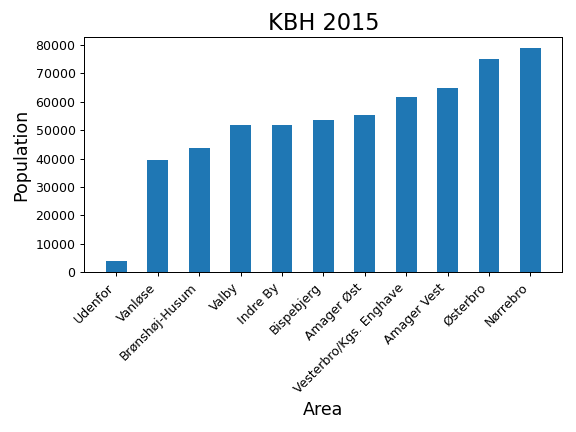

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt

sorted_data = dict(sorted(data2015.items(), key=lambda item: item[1]))

plt.title("KBH 2015", fontsize=18)
plt.ylabel("Population", fontsize=14)
plt.xlabel("Area", fontsize=14)


plt.bar(sorted_data.keys(), sorted_data.values(),width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')


plt.tight_layout()

### 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [54]:
def people_above_age_by_year(age, year=2015):
    mask_year = dd[:,0] == year
    mask_age = dd[:,2] >= age
    
    data = dd[mask_year & mask_age]
    
    return data[:,4].sum()

print("People age 65 and above in KBH (2015):", comma(people_above_age_by_year(65)))

People age 65 and above in KBH (2015): 59,859


### 6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"

In [62]:
country_codes = {0: 'Uoplyst (1)', 5001: 'Uoplyst (2)', 5100: 'Danmark', 5101: 'Grønland', 
                 5102: 'Udlandet uoplyst', 5103: 'Statsløs', 5104: 'Finland', 
                 5105: 'Island, ligeret dansk', 5106: 'Island', 5107: 'Liechtenstein', 
                 5108: 'Luxembourg', 5109: 'Monaco', 5110: 'Norge', 5114: 'Europa uoplyst', 
                 5115: 'Kongelig', 5120: 'Sverige', 5122: 'Albanien', 5124: 'Andorra', 
                 5800: 'Land ukendt (2)', 5901: 'Færøerne uoplyst', 5902: 'Færøerne', 
                 5999: 'Land ukendt (1)'}

In [68]:
import csv

nordic_countries = ["Norge","Sverige","Finland","Island","Grønland"]

total_nordic = 0   

def people_above_age_nordic_2015(age, country):
    mask_year = dd[:,0] == 2015
    mask_age = dd[:,2] >= age
    mask_country = dd[:,3] == country
    
    data = dd[mask_year & mask_age & mask_country]
    
    return data[:,4].sum()


for key, value in country_codes.items():
    if value in nordic_countries:
        pop = int(people_above_age_nordic_2015(65, key))
        print(f'People living in {value}: {pop}')
        total_nordic += pop

print(f'Total amount of people from other nordic countries in KBH (2015): {total_nordic}')

People living in Grønland: 0
People living in Finland: 78
People living in Island: 36
People living in Norge: 251
People living in Sverige: 285
Total amount of people from other nordic countries in KBH (2015): 650


### 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

In [145]:
areas = {2: 'Østerbro', 4: 'Vesterbro/Kgs. Enghave'}


data = dict()


def get_pop_year_by_area(year, area):
    mask_year = dd[:,0] == year
    mask_area = dd[:,1] == area
    
    data = dd[mask_year & mask_area]
    
    return data[:,4].sum()

def get_neighb_data(key, value, printData = False):
    new_neighb = dict()
    for year in range(1992,2016):
        if printData:
            print(f'People living in {value} ({year}): {comma(get_pop_year_by_area(year, key))}')
        # Adds each area(key) to a dict with population(value)
        new_neighb[year] = get_pop_year_by_area(year, key)
    return new_neighb


for key, value in areas.items():
    data[value] = get_neighb_data(key, value, True)

    


People living in Østerbro (1992): 62,221
People living in Østerbro (1993): 62,583
People living in Østerbro (1994): 63,050
People living in Østerbro (1995): 63,572
People living in Østerbro (1996): 64,503
People living in Østerbro (1997): 65,856
People living in Østerbro (1998): 66,148
People living in Østerbro (1999): 66,295
People living in Østerbro (2000): 66,673
People living in Østerbro (2001): 66,877
People living in Østerbro (2002): 67,020
People living in Østerbro (2003): 67,550
People living in Østerbro (2004): 67,516
People living in Østerbro (2005): 67,671
People living in Østerbro (2006): 67,351
People living in Østerbro (2007): 67,330
People living in Østerbro (2008): 67,964
People living in Østerbro (2009): 68,769
People living in Østerbro (2010): 69,951
People living in Østerbro (2011): 70,938
People living in Østerbro (2012): 72,400
People living in Østerbro (2013): 73,388
People living in Østerbro (2014): 74,521
People living in Østerbro (2015): 75,113
People living in

<IPython.core.display.Javascript object>


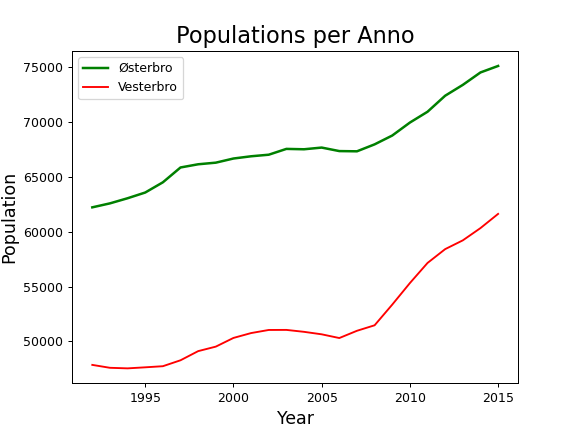

In [176]:
%matplotlib notebook




osterbro = data.get('Østerbro')
vesterbro = data.get('Vesterbro/Kgs. Enghave')


plt.figure()

plt.title("Populations per Anno", fontsize=18)
plt.ylabel("Population", fontsize=14)
plt.xlabel("Year", fontsize=14)



plt.plot(osterbro.keys(),osterbro.values(), 'g-', label='Østerbro', linewidth=2)
plt.plot(vesterbro.keys(), vesterbro.values(), 'r-', label='Vesterbro')

plt.legend(loc="upper left")
plt.show()

## Experiment: Add up to 10 areas 

In [198]:
areas = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest'}


# Sorting areas to make it more readable. Highest area-pop in 2015 first.
sorted_areas = dict(sorted(areas.items(), key=lambda item: get_pop_year_by_area(2015, item[0]), reverse=True))
print(sorted_areas)

data2 = dict()

for key, value in sorted_areas.items():
    data2[value] = get_neighb_data(key, value)

data2

{3: 'Nørrebro', 2: 'Østerbro', 10: 'Amager Vest', 4: 'Vesterbro/Kgs. Enghave', 9: 'Amager Øst', 8: 'Bispebjerg', 1: 'Indre By', 5: 'Valby', 7: 'Brønshøj-Husum', 6: 'Vanløse'}


{'Nørrebro': {1992: 67251,
  1993: 67783,
  1994: 68115,
  1995: 68638,
  1996: 69705,
  1997: 70847,
  1998: 71393,
  1999: 72378,
  2000: 72993,
  2001: 73502,
  2002: 73870,
  2003: 73830,
  2004: 73482,
  2005: 73067,
  2006: 71799,
  2007: 71315,
  2008: 71560,
  2009: 71891,
  2010: 72887,
  2011: 74129,
  2012: 75377,
  2013: 76563,
  2014: 77807,
  2015: 78802},
 'Østerbro': {1992: 62221,
  1993: 62583,
  1994: 63050,
  1995: 63572,
  1996: 64503,
  1997: 65856,
  1998: 66148,
  1999: 66295,
  2000: 66673,
  2001: 66877,
  2002: 67020,
  2003: 67550,
  2004: 67516,
  2005: 67671,
  2006: 67351,
  2007: 67330,
  2008: 67964,
  2009: 68769,
  2010: 69951,
  2011: 70938,
  2012: 72400,
  2013: 73388,
  2014: 74521,
  2015: 75113},
 'Amager Vest': {1992: 42748,
  1993: 43337,
  1994: 43309,
  1995: 43668,
  1996: 44043,
  1997: 44404,
  1998: 44864,
  1999: 45037,
  2000: 45397,
  2001: 45608,
  2002: 45685,
  2003: 45623,
  2004: 45816,
  2005: 46607,
  2006: 48631,
  2007: 51099,

<IPython.core.display.Javascript object>


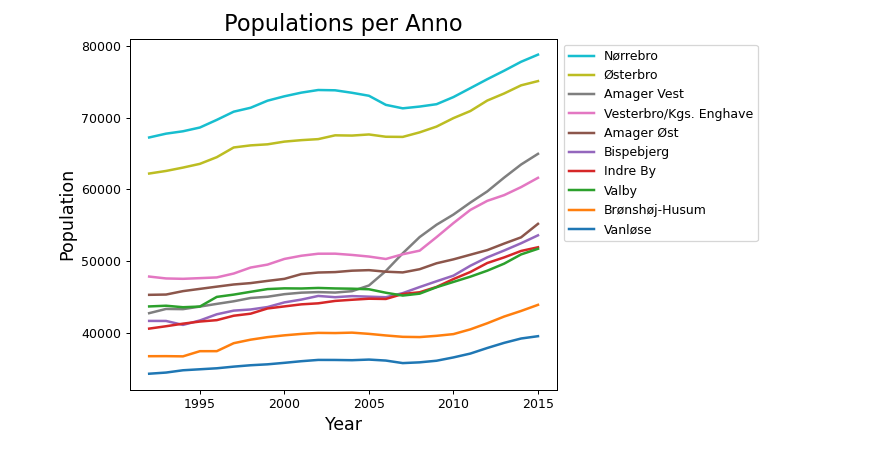

In [199]:
%matplotlib notebook



colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']



plt.figure()

plt.title("Populations per Anno", fontsize=18)
plt.ylabel("Population", fontsize=14)
plt.xlabel("Year", fontsize=14)



for key, value in data2.items():
    
    plt.plot(value.keys(),value.values(), '-', color=colors.pop(), label=key, linewidth=2)
    

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

plt.tight_layout()

## Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: DKstat_bykoder.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020


### 2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)

In [206]:
import pandas as pd 
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)

### 3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).

In [241]:
import numpy as np
filename = 'demografic_cleaned.csv'

# OMRÅDE;KØN;ALDER;TID;INDHOLD

# Difference between np.loadtxt and genfromtxt is that you can add skip_header=1 etc. when you use genfromtxt. loadtxt is more lightweight

dd = np.loadtxt(filename, delimiter=',', dtype=np.uint)

dd

array([[    0,     1,     0,  2008, 32976],
       [    0,     1,     0,  2009, 33656],
       [    0,     1,     0,  2010, 32435],
       ...,
       [  751,     2,   100,  2018,    18],
       [  751,     2,   100,  2019,    21],
       [  751,     2,   100,  2020,    23]], dtype=uint64)

### 4. Use file: DKstat_bykoder.csv to get cities from the city codes

In [261]:
area_file = '../../data/DKstat_bykoder.csv'

# [area code, name]

areas = pd.read_csv(area_file,sep=';')

for i in range(len(areas) - 90):
    print(areas.iloc[i,0], areas.iloc[i,1])

84  Region-Hovedstaden
101  København
147  Frederiksberg
155  Dragør
185  Tårnby
165  Albertslund
151  Ballerup
153  Brøndby
157  Gentofte
159  Gladsaxe
161  Glostrup
163  Herlev
167  Hvidovre
169  Høje-Taastrup


### 5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 

In [266]:
def summed_by_city(city_code, year, gender=None):
    mask_area = dd[:,0] == city_code
    mask_gender = dd[:,1] == gender if gender else True
    mask_year = dd[:,3] == year
    
    
    data = dd[mask_area & mask_gender & mask_year]
    
    return data[:,4].sum()


print("Region Hovedstaden: ", comma(summed_by_city(84, 2020)))

Region Hovedstaden:  1,822,823


In [275]:
"""
for i in range(len(areas) - 90):
    print(areas.iloc[i,0], areas.iloc[i,1])
"""
checklist = [84,147,400,85,83,461,561,82,751,81,851]

data = dict()




for i in range(len(areas)):
    area_code = areas.iloc[i,0]
    if area_code in checklist:
        area_name = areas.iloc[i,1]
        value = summed_by_city(area_code, 2020, 1) / summed_by_city(area_code, 2020)  
        if value > 0:
            data[area_name] = value 


sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))
sorted_data


{' Region-Nordjylland': 0.5050556784098637,
 ' Aalborg': 0.5041119110374309,
 ' Esbjerg': 0.5013873692502954,
 ' Region-Midtjylland': 0.5003713192125288,
 ' Region-Syddanmark': 0.5000499964052172,
 ' Region-Sjælland': 0.49853303447127717,
 ' Odense': 0.4951125446331696,
 ' Bornholm': 0.49496807151979566,
 ' Aarhus': 0.4912706026491597,
 ' Region-Hovedstaden': 0.49083098029814193,
 ' Frederiksberg': 0.4742871022589264}

### 6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020